**Data Analytics :**  **Data Driven Insights on Student Success Factors Analysis** <br>

<img src="CC.png" alt="My Image" style="float: left; margin-right: 10px;" width="150" height="100">



IP - 5497 <br>
Project Team Lead : Jishan Attar <br>
Project Sponsor : Tushar Topale <br>
Project Manager : Harshada Topale <br>
Created On : 05-10-2024 

*Cloud Counselage Pvt. Ltd.*

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("Data analyst Data.xlsx")

In [12]:
#1. HOW MANY UNIQUE STUDENTS ARE INCLUDED IN THE DATASET?
unique_students = df['Email ID'].nunique()
print(f'Number of unique students: {unique_students}')


Number of unique students: 2157


In [9]:
# 2. Calculate the average GPA of the students
average_gpa = df['CGPA'].mean()
print("Average GPA:", average_gpa)

Average GPA: 8.038475684511647


In [11]:
# 3. Distribution of students across different graduation years
graduation_year_distribution = df['Year of Graduation'].value_counts()
print("Graduation Year Distribution:\n", graduation_year_distribution)

Graduation Year Distribution:
 Year of Graduation
2023    1536
2024    1511
2025    1292
2026     555
Name: count, dtype: int64


In [13]:
# 4. Distribution of students' experience with Python programming
python_experience_distribution = df['Experience with python (Months)'].value_counts()
print("Python Experience Distribution:\n", python_experience_distribution)

Python Experience Distribution:
 Experience with python (Months)
5    1242
3    1008
8     800
6     738
7     640
4     466
Name: count, dtype: int64


In [14]:
# 5. Average family income of students
# First, we need to map income ranges to numeric values for proper averaging
income_mapping = {
    '0-2 Lakh': 1, 
    '2-5 Lakh': 3.5, 
    '5-7 Lakh': 6, 
    '7 Lakh+': 7.5
}

df['Family Income (Numeric)'] = df['Family Income'].map(income_mapping)
average_family_income = df['Family Income (Numeric)'].mean()

print("Average Family Income:", average_family_income)


Average Family Income: 1.3021046178994686


In [15]:
# 6. GPA variation among different colleges (Top 5 results)
gpa_by_college = df.groupby('College Name')['CGPA'].mean().nlargest(5)
print("Top 5 Colleges by GPA:\n", gpa_by_college)

Top 5 Colleges by GPA:
 College Name
THAKUR INSTITUTE OF MANAGEMENT STUDIES, CAREER DEVELOPMENT & RESEARCH - [TIMSCDR]    8.585714
St Xavier's College                                                                  8.578571
B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan                 8.456410
Symbiosis Institute of Technology, Pune                                              8.303448
AP SHAH INSTITUTE OF TECHNOLOGY                                                      8.283333
Name: CGPA, dtype: float64


In [16]:
# 7. Checking for outliers in the number of courses completed (Quantity)
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_in_quantity = df[(df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound)]
print("Number of Outliers in Quantity:", outliers_in_quantity.shape[0])

Number of Outliers in Quantity: 0


In [19]:
# 8. Average GPA for students from each city
gpa_by_city = df.groupby('City')['CGPA'].mean()
print("Average GPA by City:\n", gpa_by_city)

Average GPA by City:
 City
Agartala     7.660714
Agra         8.046429
Ahemdabad    8.190385
Ajmer        8.284314
Akola        8.021429
               ...   
Vidisha      7.738095
Vijaywada    7.986364
Wardha       8.328571
konark       8.071429
kullu        7.878571
Name: CGPA, Length: 177, dtype: float64


In [20]:
# 9. Relationship between family income and GPA (correlation analysis)
correlation_income_gpa = df['Family Income (Numeric)'].corr(df['CGPA'])
print("Correlation between Family Income and GPA:", correlation_income_gpa)

Correlation between Family Income and GPA: 0.015547185654985972


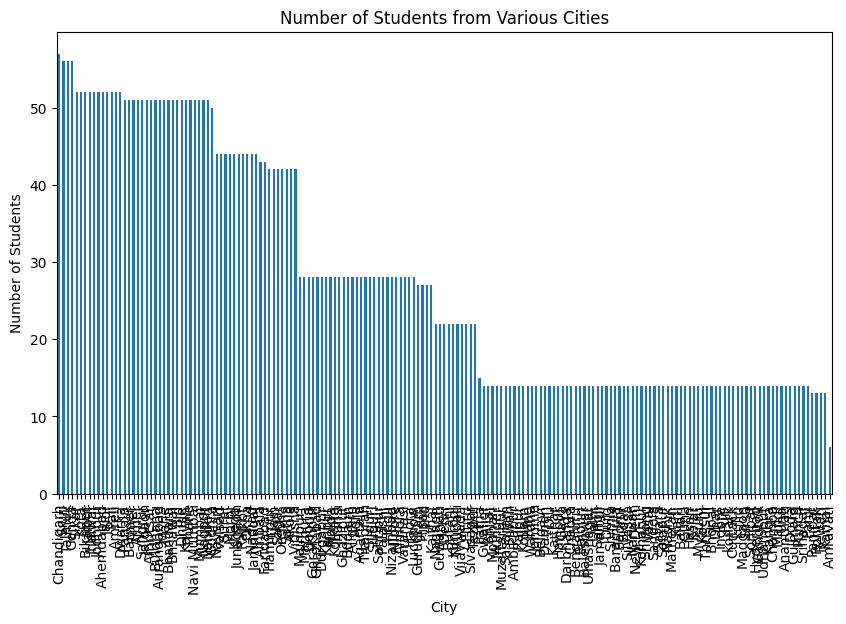

In [21]:
import matplotlib.pyplot as plt

# 10. Count of students from various cities
city_distribution = df['City'].value_counts()

# Plotting the city distribution
plt.figure(figsize=(10, 6))
city_distribution.plot(kind='bar')
plt.title("Number of Students from Various Cities")
plt.xlabel("City")
plt.ylabel("Number of Students")
plt.xticks(rotation=90)
plt.show()


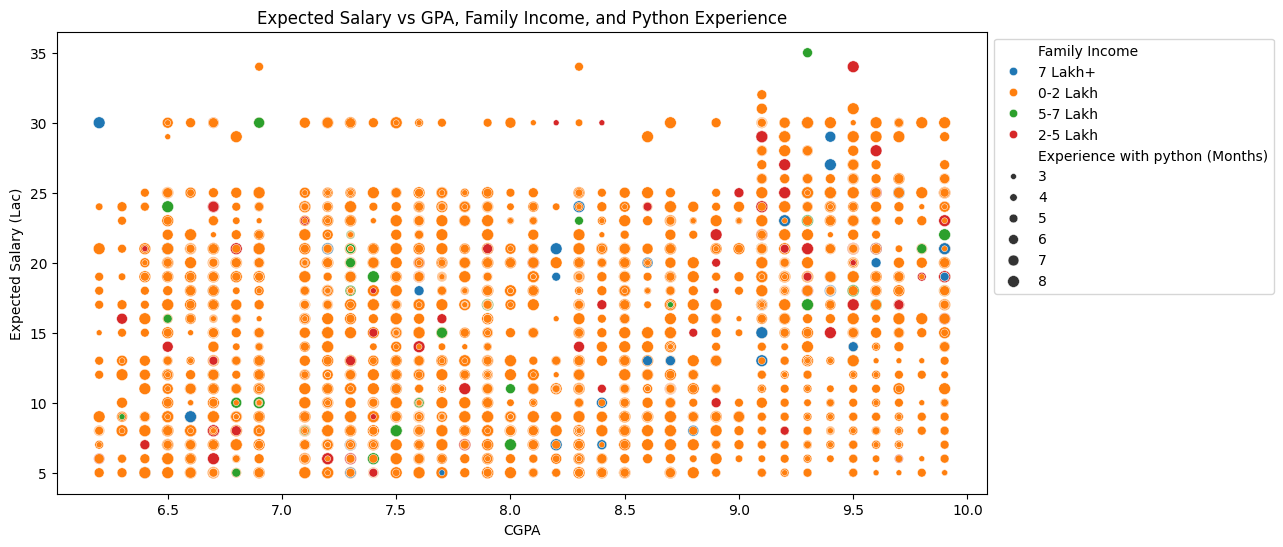

In [22]:
import seaborn as sns

# 11. Plot expected salary vs GPA, family income, and Python experience
plt.figure(figsize=(12, 6))
sns.scatterplot(x='CGPA', y='Expected salary (Lac)', hue='Family Income', size='Experience with python (Months)', data=df)
plt.title("Expected Salary vs GPA, Family Income, and Python Experience")
plt.xlabel("CGPA")
plt.ylabel("Expected Salary (Lac)")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


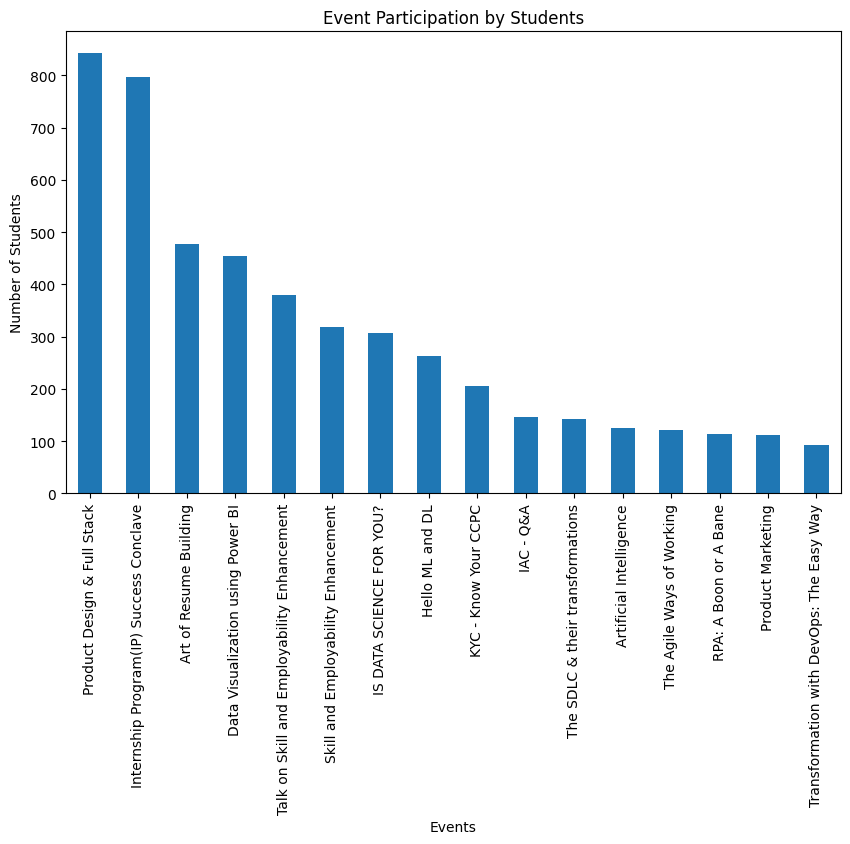

In [23]:
# 12. Count of students attending each event
event_distribution = df['Events'].value_counts()

# Plotting the event distribution
plt.figure(figsize=(10, 6))
event_distribution.plot(kind='bar')
plt.title("Event Participation by Students")
plt.xlabel("Events")
plt.ylabel("Number of Students")
plt.xticks(rotation=90)
plt.show()


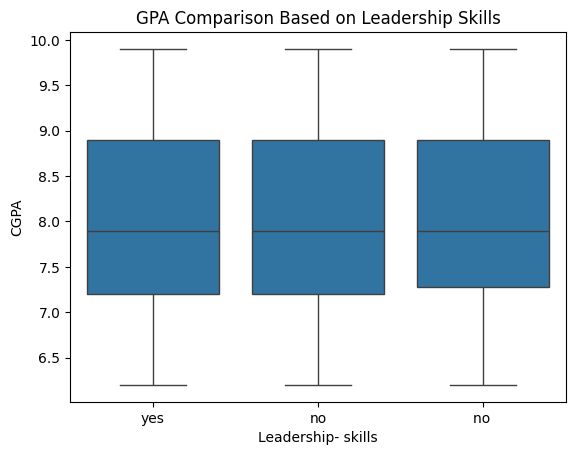

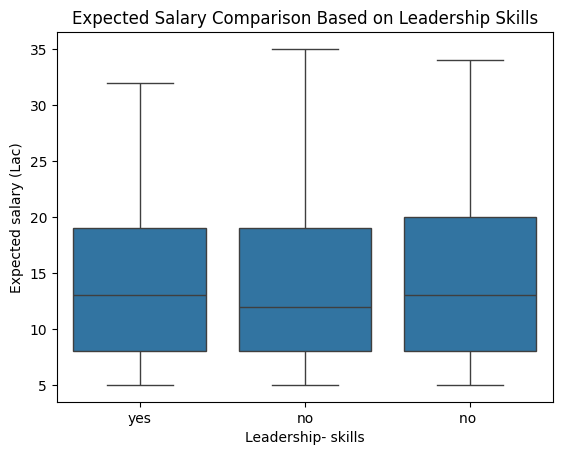

In [24]:
# 13. Comparing GPA and expected salary based on leadership positions
sns.boxplot(x='Leadership- skills', y='CGPA', data=df)
plt.title("GPA Comparison Based on Leadership Skills")
plt.show()

sns.boxplot(x='Leadership- skills', y='Expected salary (Lac)', data=df)
plt.title("Expected Salary Comparison Based on Leadership Skills")
plt.show()


In [25]:
# 14. Counting students graduating by the end of 2024
students_graduating_2024 = df[df['Year of Graduation'] <= 2024].shape[0]
print("Number of students graduating by the end of 2024:", students_graduating_2024)


Number of students graduating by the end of 2024: 3047


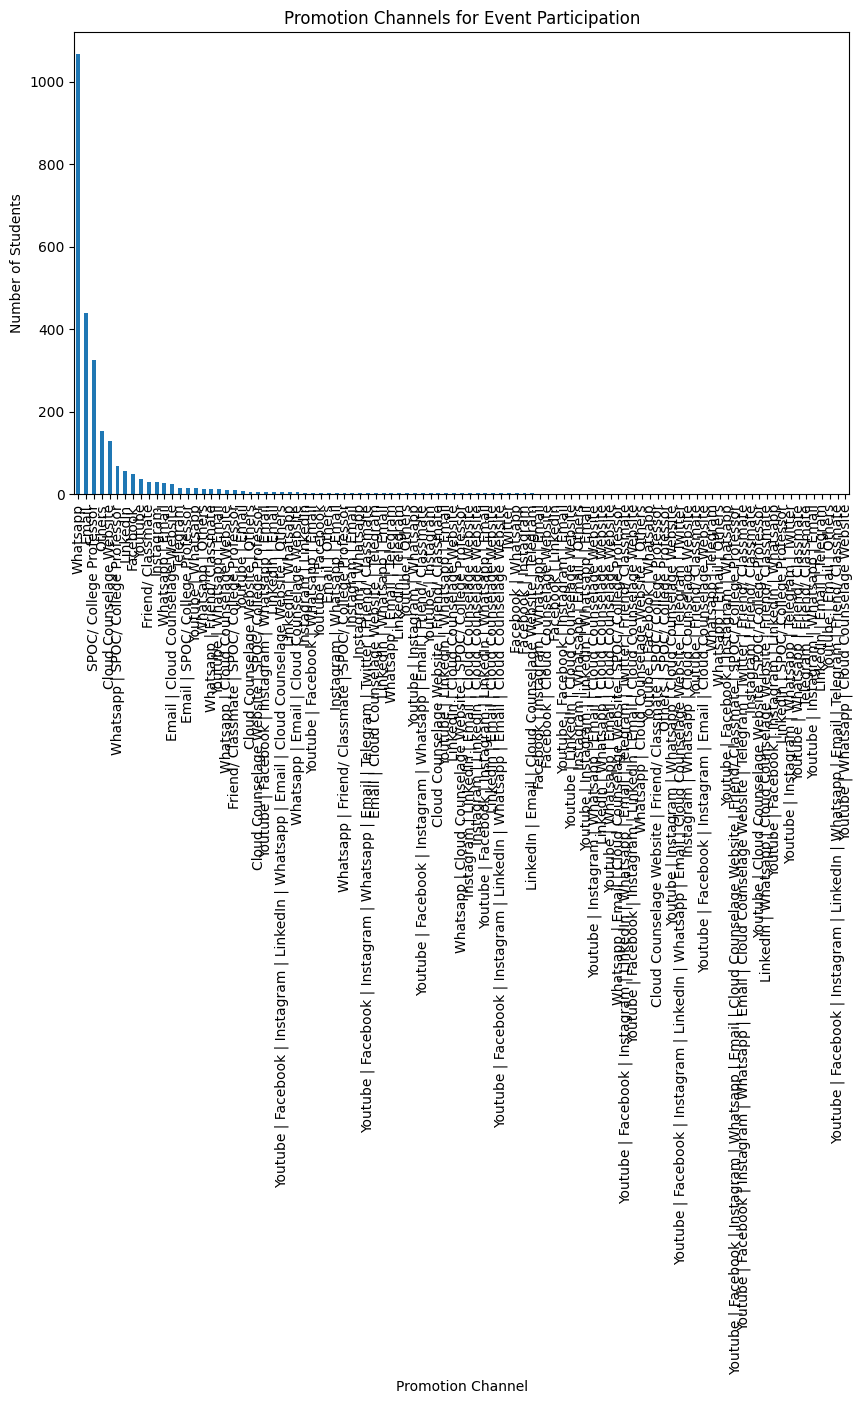

In [26]:
# 15. Count of students from different promotion channels
promotion_channel_distribution = df['How did you come to know about this event?'].value_counts()

# Plotting the distribution of promotion channels
plt.figure(figsize=(10, 6))
promotion_channel_distribution.plot(kind='bar')
plt.title("Promotion Channels for Event Participation")
plt.xlabel("Promotion Channel")
plt.ylabel("Number of Students")
plt.xticks(rotation=90)
plt.show()


In [27]:
# 16. Filter for Data Science related events
data_science_events = df[df['Events'].str.contains("Data Science", case=False, na=False)]
num_students_data_science = data_science_events['Email ID'].nunique()
print("Number of students who attended Data Science related events:", num_students_data_science)


Number of students who attended Data Science related events: 218


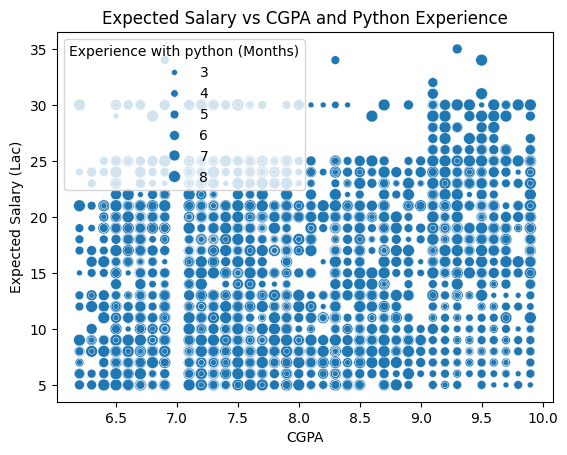

In [28]:
# 17. Compare expected salary based on CGPA and Python experience
sns.scatterplot(x='CGPA', y='Expected salary (Lac)', size='Experience with python (Months)', data=df)
plt.title("Expected Salary vs CGPA and Python Experience")
plt.xlabel("CGPA")
plt.ylabel("Expected Salary (Lac)")
plt.show()


In [29]:
# 18. Filter for students who learned about the event from their college
students_from_colleges = df[df['How did you come to know about this event?'].str.contains("College", case=False, na=False)]

# Count the number of students from each college
top_5_colleges = students_from_colleges['College Name'].value_counts().nlargest(5)

print("Top 5 colleges where students learned about the event:")
print(top_5_colleges)


Top 5 colleges where students learned about the event:
College Name
vidyalankar institute of technology, mumbai              23
kle society's college of bca, rls institute, belagavi    23
mit academy of engineering ,alandi                       23
ld college of engineering, ahmedabad, gujarat            20
priyadarshini college of engineering, nagpur             20
Name: count, dtype: int64
